## General Information


This notebook aim to understand the dataset and perform early cleaning:


In [18]:
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize,wordpunct_tokenize
from nltk.corpus import words

from nltk.stem import WordNetLemmatizer

from pandarallel import pandarallel
from bs4 import BeautifulSoup

In [3]:
pandarallel.initialize(progress_bar=True,
                        nb_workers=6,
                        #verbose=1
                       )

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [2]:
df = pd.read_csv('/Users/maurelco/Developer/Python/Projet 4/data/Source/QueryResults-3.csv')

In [4]:
df

,Id,Title,Body,Tags,Score,ViewCount,FavoriteCount,AnswerCount
0,4019784,Giving a unix process exclusive RW access to a...,<p>Is there a way to sandbox a linux process i...,<linux><ubuntu><process><sandbox><selinux>,2,406,0.0,4
1,4219547,automatic repaint when minimizing window,"<p>I have a JFrame, with two panels, in one pa...",<java><graphics><jframe><jpanel><paint>,1,4225,NaN,3
2,4529530,Is man-in-the-middle attack a security threat ...,"<p>I am no expert in network security, so pard...",<security><ssh><ssh-keys><openssh><man-in-the-...,11,10589,0.0,2
3,4529565,Managing data access in a simple WinForms app,<p>I have a simple WinForms data entry app tha...,<c#><winforms><sqlite><datatable><sqlconnection>,0,1670,NaN,1
4,4529586,Render basic HTML view?,<p>I have a basic Node.js app that I am trying...,<javascript><html><node.js><mongodb><express>,316,516830,0.0,31
...,...,...,...,...,...,...,...,...
49995,68396411,Bypass Vertica ERROR 3326: Execution time exce...,<p>Using the <code>SSIS</code> tool and <code>...,<sql-server><ssas><oledb><sql-server-data-tool...,0,734,NaN,1
49996,68396463,A conflicting conditional operation is current...,"<p>Using s3fs, I am uploading a file to the al...",<python><amazon-web-services><amazon-s3><boto3...,0,670,NaN,2
49997,68396513,Problem in lr_find() in Pytorch fastai course,<p>While following the Jupyter notebooks for t...,<python><machine-learning><deep-learning><pyto...,4,1260,NaN,1
49998,68396523,JSONPatch escape slash '/' from JSONPatch+JSON,<p>I've below JSON and I wanted to update few ...,<java><json><rest><json-patch><http-patch>,1,509,0.0,1


### 1. Data cleaning

#### 1.1 NaN values

In [5]:
df.nunique()

Id               50000
Title            49999
Body             50000
Tags             48824
Score              416
ViewCount        12679
FavoriteCount        2
AnswerCount         50
dtype: int64

In [6]:
df.isna().sum()

Id                   0
Title                0
Body                 0
Tags                 0
Score                0
ViewCount            0
FavoriteCount    28965
AnswerCount          0
dtype: int64

In [6]:
df.isna().mean()

Id               0.0000
Title            0.0000
Body             0.0000
Tags             0.0000
Score            0.0000
ViewCount        0.0000
FavoriteCount    0.5793
AnswerCount      0.0000
dtype: float64

#### 1.2 Duplicated values

In [7]:
df.duplicated().sum()

0

In [8]:
df.duplicated(subset='Body').sum()

0

#### 1.3 Selection of important features

In [9]:
tmp= df.dtypes
tmp

Id                 int64
Title             object
Body              object
Tags              object
Score              int64
ViewCount          int64
FavoriteCount    float64
AnswerCount        int64
dtype: object

In [10]:
cols = ['Title','Body','Tags']
df = df[cols]
df.head(5)

,Title,Body,Tags
0,Giving a unix process exclusive RW access to a...,<p>Is there a way to sandbox a linux process i...,<linux><ubuntu><process><sandbox><selinux>
1,automatic repaint when minimizing window,"<p>I have a JFrame, with two panels, in one pa...",<java><graphics><jframe><jpanel><paint>
2,Is man-in-the-middle attack a security threat ...,"<p>I am no expert in network security, so pard...",<security><ssh><ssh-keys><openssh><man-in-the-...
3,Managing data access in a simple WinForms app,<p>I have a simple WinForms data entry app tha...,<c#><winforms><sqlite><datatable><sqlconnection>
4,Render basic HTML view?,<p>I have a basic Node.js app that I am trying...,<javascript><html><node.js><mongodb><express>


#### 1.4 Delete HTML and Lower text

In [11]:
df['Body']= df['Body'].apply(lambda x: (BeautifulSoup(x).get_text()).lower())
df.head(10)

,Title,Body,Tags
0,Giving a unix process exclusive RW access to a...,is there a way to sandbox a linux process into...,<linux><ubuntu><process><sandbox><selinux>
1,automatic repaint when minimizing window,"i have a jframe, with two panels, in one panel...",<java><graphics><jframe><jpanel><paint>
2,Is man-in-the-middle attack a security threat ...,"i am no expert in network security, so pardon ...",<security><ssh><ssh-keys><openssh><man-in-the-...
3,Managing data access in a simple WinForms app,i have a simple winforms data entry app that u...,<c#><winforms><sqlite><datatable><sqlconnection>
4,Render basic HTML view?,i have a basic node.js app that i am trying to...,<javascript><html><node.js><mongodb><express>
5,How to use nested-subfloders routing in nodejs...,i am working on a node project using express. ...,<node.js><express><routes><nested-routes><modu...
6,Using generics to process asp.net form request...,using jquery to post values back to an asp.net...,<c#><asp.net><generics><reflection><webforms>
7,Simple SELECT(*) queries very slow in Apache I...,i'm prototyping apache ignite for use in a new...,<sql><performance><key-value><ignite><in-memor...
8,MS SQL Server optimizer and varying table and ...,we have a lot of queries for which we append a...,<sql><sql-server><sql-server-2005><tsql><query...
9,How to wait for process child?,i do the usual fork + exec combination:\nint s...,<linux><posix><exec><fork><wait>


In [12]:
df['Title']= df['Title'].apply(lambda x: x.lower())
df.head(10)

,Title,Body,Tags
0,giving a unix process exclusive rw access to a...,is there a way to sandbox a linux process into...,<linux><ubuntu><process><sandbox><selinux>
1,automatic repaint when minimizing window,"i have a jframe, with two panels, in one panel...",<java><graphics><jframe><jpanel><paint>
2,is man-in-the-middle attack a security threat ...,"i am no expert in network security, so pardon ...",<security><ssh><ssh-keys><openssh><man-in-the-...
3,managing data access in a simple winforms app,i have a simple winforms data entry app that u...,<c#><winforms><sqlite><datatable><sqlconnection>
4,render basic html view?,i have a basic node.js app that i am trying to...,<javascript><html><node.js><mongodb><express>
5,how to use nested-subfloders routing in nodejs...,i am working on a node project using express. ...,<node.js><express><routes><nested-routes><modu...
6,using generics to process asp.net form request...,using jquery to post values back to an asp.net...,<c#><asp.net><generics><reflection><webforms>
7,simple select(*) queries very slow in apache i...,i'm prototyping apache ignite for use in a new...,<sql><performance><key-value><ignite><in-memor...
8,ms sql server optimizer and varying table and ...,we have a lot of queries for which we append a...,<sql><sql-server><sql-server-2005><tsql><query...
9,how to wait for process child?,i do the usual fork + exec combination:\nint s...,<linux><posix><exec><fork><wait>


In [13]:
df['Title'][37847]

"why 0/0 is nan but 0/0.00 isn't"

##### ... Saving the cleaned dataset ...

In [8]:
df.to_csv("data/cleaned/df_cleaned.csv", index= False)

##### ... cleaned dataset saved ...

#### 1.4 Analysis of the words frequency

In [14]:
df.describe(include=np.number)

ValueError: No objects to concatenate

In [15]:
df.describe(include=object)

,Title,Body,Tags
count,50000,50000,50000
unique,49999,50000,48824
top,login method customization using gina,is there a way to sandbox a linux process into...,<javascript><jquery><html><css><twitter-bootst...
freq,2,1,46


In [16]:
df.Tags.value_counts()[:10]

<javascript><jquery><html><css><twitter-bootstrap>         46
<javascript><php><jquery><html><ajax>                      29
<javascript><php><jquery><html><css>                       19
<javascript><node.js><mongodb><express><mongoose>          16
<javascript><php><jquery><mysql><ajax>                     16
<javascript><php><jquery><ajax><json>                      12
<python><selenium><xpath><css-selectors><webdriverwait>    11
<javascript><php><jquery><ajax><forms>                     11
<javascript><jquery><html><css><iframe>                    10
<c#><asp.net><asp.net-mvc><asp.net-mvc-4><razor>           10
Name: Tags, dtype: int64

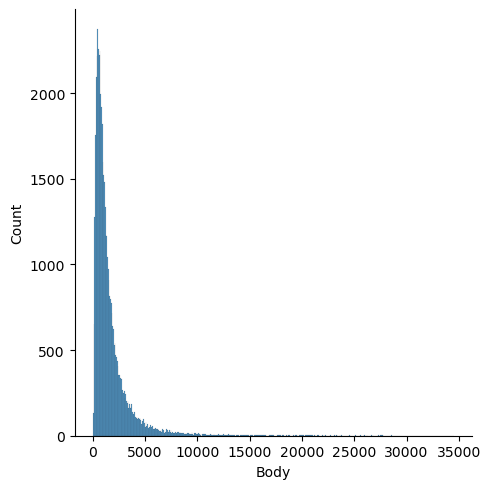

In [19]:
tmp = df.Body.str.len()
sns.displot(tmp)

<AxesSubplot: >

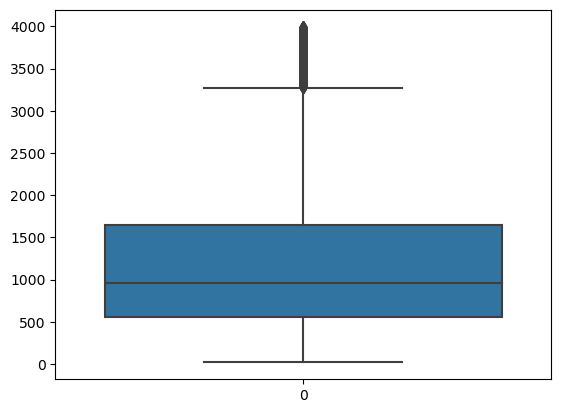

In [22]:
sns.boxplot(tmp[tmp < 4000])

In [23]:
df["_len_txt"] = tmp
df.head(10)

,Title,Body,Tags,_len_txt
0,giving a unix process exclusive rw access to a...,is there a way to sandbox a linux process into...,<linux><ubuntu><process><sandbox><selinux>,840
1,automatic repaint when minimizing window,"i have a jframe, with two panels, in one panel...",<java><graphics><jframe><jpanel><paint>,4960
2,is man-in-the-middle attack a security threat ...,"i am no expert in network security, so pardon ...",<security><ssh><ssh-keys><openssh><man-in-the-...,660
3,managing data access in a simple winforms app,i have a simple winforms data entry app that u...,<c#><winforms><sqlite><datatable><sqlconnection>,3859
4,render basic html view?,i have a basic node.js app that i am trying to...,<javascript><html><node.js><mongodb><express>,513
5,how to use nested-subfloders routing in nodejs...,i am working on a node project using express. ...,<node.js><express><routes><nested-routes><modu...,1029
6,using generics to process asp.net form request...,using jquery to post values back to an asp.net...,<c#><asp.net><generics><reflection><webforms>,1083
7,simple select(*) queries very slow in apache i...,i'm prototyping apache ignite for use in a new...,<sql><performance><key-value><ignite><in-memor...,1521
8,ms sql server optimizer and varying table and ...,we have a lot of queries for which we append a...,<sql><sql-server><sql-server-2005><tsql><query...,579
9,how to wait for process child?,i do the usual fork + exec combination:\nint s...,<linux><posix><exec><fork><wait>,411


In [24]:
df.sort_values('_len_txt').head(10)

,Title,Body,Tags,_len_txt
19855,why the web.config isn't copied when i publish...,how to correct it?\n,<.net><asp.net><visual-studio><visual-studio-2...,19
42477,how do i check if the browser supports cookies...,especially for the iphone\n,<javascript><jquery><iphone><session><cookies>,26
39277,how to hide all url in firefox status bar when...,anyone can give me the answer? tq.\n,<firefox><url><hyperlink><hide><statusbar>,35
2267,concatenating two std::vectors,how do i concatenate two std::vectors?\n,<c++><vector><stl><concatenation><stdvector>,39
12364,creating a div element in jquery,how do i create a div element in jquery?\n,<javascript><jquery><html><append><jquery-append>,41
8160,where can i find a list of all hql keywords?,where can i find a list of all hql keywords?\n,<java><hibernate><jpa><hql><keyword>,45
2281,encrypt and decrypt a string in c#?,how can i encrypt and decrypt a string in c#?\n,<c#><.net><encryption><mono><cryptography>,46
25416,how to eliminate outlier in spotfire box plots,"thanks for your help in advance.\nregards,\nraj\n",<max><min><box><spotfire><outliers>,46
47642,expand value_counts() view?,does anybody know how i visualize all values?\n\n,<python><pandas><count><distinct-values><visua...,47
26297,what parts of .net aren't available in monotou...,what are some key bindings that aren't include...,<.net><iphone><mobile><xamarin.ios><mobile-web...,49


In [25]:
df.sort_values('_len_txt').tail(10)

,Title,Body,Tags,_len_txt
44198,active model serializer - increasing render pe...,i'm running into a particular situation where ...,<ruby-on-rails><json><ruby-on-rails-4><seriali...,28569
49523,gradle error when deploying to nexus repository,"today, i have been migrating some java plugins...",<java><gradle><intellij-idea><nexus3><maven-pu...,28732
31542,glassfish 3.1.2.2. build 5 ear application dep...,i am getting digester error in my production e...,<java><linux><glassfish><glassfish-3><apache-c...,28796
39564,"getting ""gateway timeout"" error when using zuu...",i am developing spring boot microservices for ...,<spring-boot><spring-cloud><netflix-eureka><ne...,28981
28964,connecting to mysql server from docker container,i am a total noob when it come to docker. i am...,<java><mysql><spring-boot><docker><spring-data...,29281
8809,how do i configure webservicetemplate to send ...,i have configured keystore and trustore for t...,<java><web-services><soap><spring-ws><two-way>,29481
44927,getting org.springframework.beans.factory.smar...,org.apache.maven.lifecycle.lifecycleexecutione...,<java><spring><spring-security><maven-3><aspec...,29648
20092,arcgis for android with popup and routing,i want do develop an android app with the sdk ...,<java><android><routing><popup><arcgis>,29986
6176,how do i fix shocking/lagging movement in this...,"edit: important, examples must be used in fire...",<javascript><ajax><html><canvas><lag>,33171
14967,webkit @font-face rendering issue - some eleme...,"i'm busy building a site on my local server, a...",<html><css><firefox><webkit><font-face>,34559


In [26]:
df.drop(columns='_len_txt',inplace=True)
df.head(5)

,Title,Body,Tags
0,giving a unix process exclusive rw access to a...,is there a way to sandbox a linux process into...,<linux><ubuntu><process><sandbox><selinux>
1,automatic repaint when minimizing window,"i have a jframe, with two panels, in one panel...",<java><graphics><jframe><jpanel><paint>
2,is man-in-the-middle attack a security threat ...,"i am no expert in network security, so pardon ...",<security><ssh><ssh-keys><openssh><man-in-the-...
3,managing data access in a simple winforms app,i have a simple winforms data entry app that u...,<c#><winforms><sqlite><datatable><sqlconnection>
4,render basic html view?,i have a basic node.js app that i am trying to...,<javascript><html><node.js><mongodb><express>


### 2 Preliminary text processing analysis

#### 2.1 Tokenization selection

In [27]:
def display_tokens_info(tokens):
    """display info about corpus"""
    print(f"nb tokens {len(tokens)}, nb tokens uniques {len(set(tokens))}")
    print(tokens[:1000])

In [28]:
doc = df.Body.sample(1)
doc

18829    i have these data in thhe codebehind and tried...
Name: Body, dtype: object

In [29]:
doc = doc.values[0]
doc

'i have these data in thhe codebehind and tried to pass it to javascript function in various format: array of list, json string but no way to get data by a javascript var object.\nhere the last format of data in the code behind:\n    list<string>[] array2 = new list<string>[listlenght];\n    array2.initialize();\n\n    for (int ii = 0; ii < listlenght; ii++)\n    {\n    array2[ii] = new list<string>();\n       array2[ii].add(convert.tostring(dt.rows[ii][5]));\n       array2[ii].add(convert.tostring(dt.rows[ii][9]));\n       array2[ii].add(convert.tostring(dt.rows[ii][10]));\n       array2[ii].add(convert.tostring(dt.rows[ii][11]));\n\n    }\n\nthen tried to call javascriot in this way:\n   string createarrayscript = string.format("var array2 = [{0},{1},{2},{3}];",         string.join(",",",",",", array2));\n\nbut return an error: formatexception was unhandled by user code\nthe index (zero based) must be greater than or equal to zero and less than the size of the list of topics.\nthis i

In [30]:
txt_1 = f"tag : {df['Tags'][27287]}\n"
txt_2 = f"title : {df['Title'][27287]}\n"
print(txt_1+txt_2+df['Body'][27287]+"..."+"\n\n")

tag : <javascript><php><jquery><ajax><laravel>
title : ajax laravel return view 500 error
i am getting each slider value in slide (jquery ui slider) via ajax to my controller.
the slider + ajax looks like this:
    $("#slidernumch").slider({
        range: "min",
        min: 0,
        max: 20,
        step: 1,
        value: numbersofchapters,
        change : function(e, slider){
            $('#sliderappendnumch').empty();
            var slidervalue  = slider.value;
            var getsliderval = document.getelementbyid('slidervalue').value = slidervalue;
            var getprid      = document.getelementbyid('editid').value;

            $.ajaxsetup({
                headers: {
                    'x-csrf-token': $('meta[name="csrf-token"]').attr('content')
                }
            });
            $.ajax({
                type: 'post',
                url: "{{ route('editproductpost', $product->id) }}",
                headers: {
                    'x-requested-with': 'xmlh

In [31]:
tokens_1 = word_tokenize(doc)
display_tokens_info(tokens_1)

nb tokens 444, nb tokens uniques 126
['i', 'have', 'these', 'data', 'in', 'thhe', 'codebehind', 'and', 'tried', 'to', 'pass', 'it', 'to', 'javascript', 'function', 'in', 'various', 'format', ':', 'array', 'of', 'list', ',', 'json', 'string', 'but', 'no', 'way', 'to', 'get', 'data', 'by', 'a', 'javascript', 'var', 'object', '.', 'here', 'the', 'last', 'format', 'of', 'data', 'in', 'the', 'code', 'behind', ':', 'list', '<', 'string', '>', '[', ']', 'array2', '=', 'new', 'list', '<', 'string', '>', '[', 'listlenght', ']', ';', 'array2.initialize', '(', ')', ';', 'for', '(', 'int', 'ii', '=', '0', ';', 'ii', '<', 'listlenght', ';', 'ii++', ')', '{', 'array2', '[', 'ii', ']', '=', 'new', 'list', '<', 'string', '>', '(', ')', ';', 'array2', '[', 'ii', ']', '.add', '(', 'convert.tostring', '(', 'dt.rows', '[', 'ii', ']', '[', '5', ']', ')', ')', ';', 'array2', '[', 'ii', ']', '.add', '(', 'convert.tostring', '(', 'dt.rows', '[', 'ii', ']', '[', '9', ']', ')', ')', ';', 'array2', '[', 'ii', ']

In [32]:
tokens_2 = wordpunct_tokenize(doc)
display_tokens_info(tokens_2)

nb tokens 408, nb tokens uniques 150
['i', 'have', 'these', 'data', 'in', 'thhe', 'codebehind', 'and', 'tried', 'to', 'pass', 'it', 'to', 'javascript', 'function', 'in', 'various', 'format', ':', 'array', 'of', 'list', ',', 'json', 'string', 'but', 'no', 'way', 'to', 'get', 'data', 'by', 'a', 'javascript', 'var', 'object', '.', 'here', 'the', 'last', 'format', 'of', 'data', 'in', 'the', 'code', 'behind', ':', 'list', '<', 'string', '>[]', 'array2', '=', 'new', 'list', '<', 'string', '>[', 'listlenght', '];', 'array2', '.', 'initialize', '();', 'for', '(', 'int', 'ii', '=', '0', ';', 'ii', '<', 'listlenght', ';', 'ii', '++)', '{', 'array2', '[', 'ii', ']', '=', 'new', 'list', '<', 'string', '>();', 'array2', '[', 'ii', '].', 'add', '(', 'convert', '.', 'tostring', '(', 'dt', '.', 'rows', '[', 'ii', '][', '5', ']));', 'array2', '[', 'ii', '].', 'add', '(', 'convert', '.', 'tostring', '(', 'dt', '.', 'rows', '[', 'ii', '][', '9', ']));', 'array2', '[', 'ii', '].', 'add', '(', 'convert', '

In [33]:
stop_words = set(nltk.corpus.stopwords.words('English'))

In [34]:
tokens_1 = [ w for w in tokens_1 if w not in stop_words]
display_tokens_info(tokens_1)

nb tokens 391, nb tokens uniques 100
['data', 'thhe', 'codebehind', 'tried', 'pass', 'javascript', 'function', 'various', 'format', ':', 'array', 'list', ',', 'json', 'string', 'way', 'get', 'data', 'javascript', 'var', 'object', '.', 'last', 'format', 'data', 'code', 'behind', ':', 'list', '<', 'string', '>', '[', ']', 'array2', '=', 'new', 'list', '<', 'string', '>', '[', 'listlenght', ']', ';', 'array2.initialize', '(', ')', ';', '(', 'int', 'ii', '=', '0', ';', 'ii', '<', 'listlenght', ';', 'ii++', ')', '{', 'array2', '[', 'ii', ']', '=', 'new', 'list', '<', 'string', '>', '(', ')', ';', 'array2', '[', 'ii', ']', '.add', '(', 'convert.tostring', '(', 'dt.rows', '[', 'ii', ']', '[', '5', ']', ')', ')', ';', 'array2', '[', 'ii', ']', '.add', '(', 'convert.tostring', '(', 'dt.rows', '[', 'ii', ']', '[', '9', ']', ')', ')', ';', 'array2', '[', 'ii', ']', '.add', '(', 'convert.tostring', '(', 'dt.rows', '[', 'ii', ']', '[', '10', ']', ')', ')', ';', 'array2', '[', 'ii', ']', '.add', '('

In [35]:
tokens_2 = [ w for w in tokens_2 if w not in stop_words]
display_tokens_info(tokens_2)

nb tokens 354, nb tokens uniques 124
['data', 'thhe', 'codebehind', 'tried', 'pass', 'javascript', 'function', 'various', 'format', ':', 'array', 'list', ',', 'json', 'string', 'way', 'get', 'data', 'javascript', 'var', 'object', '.', 'last', 'format', 'data', 'code', 'behind', ':', 'list', '<', 'string', '>[]', 'array2', '=', 'new', 'list', '<', 'string', '>[', 'listlenght', '];', 'array2', '.', 'initialize', '();', '(', 'int', 'ii', '=', '0', ';', 'ii', '<', 'listlenght', ';', 'ii', '++)', '{', 'array2', '[', 'ii', ']', '=', 'new', 'list', '<', 'string', '>();', 'array2', '[', 'ii', '].', 'add', '(', 'convert', '.', 'tostring', '(', 'dt', '.', 'rows', '[', 'ii', '][', '5', ']));', 'array2', '[', 'ii', '].', 'add', '(', 'convert', '.', 'tostring', '(', 'dt', '.', 'rows', '[', 'ii', '][', '9', ']));', 'array2', '[', 'ii', '].', 'add', '(', 'convert', '.', 'tostring', '(', 'dt', '.', 'rows', '[', 'ii', '][', '10', ']));', 'array2', '[', 'ii', '].', 'add', '(', 'convert', '.', 'tostring'

In [36]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
tokens_3 = tokenizer.tokenize(doc)
display_tokens_info(tokens_3)

nb tokens 238, nb tokens uniques 116
['i', 'have', 'these', 'data', 'in', 'thhe', 'codebehind', 'and', 'tried', 'to', 'pass', 'it', 'to', 'javascript', 'function', 'in', 'various', 'format', 'array', 'of', 'list', 'json', 'string', 'but', 'no', 'way', 'to', 'get', 'data', 'by', 'a', 'javascript', 'var', 'object', 'here', 'the', 'last', 'format', 'of', 'data', 'in', 'the', 'code', 'behind', 'list', 'string', 'array2', 'new', 'list', 'string', 'listlenght', 'array2', 'initialize', 'for', 'int', 'ii', '0', 'ii', 'listlenght', 'ii', 'array2', 'ii', 'new', 'list', 'string', 'array2', 'ii', 'add', 'convert', 'tostring', 'dt', 'rows', 'ii', '5', 'array2', 'ii', 'add', 'convert', 'tostring', 'dt', 'rows', 'ii', '9', 'array2', 'ii', 'add', 'convert', 'tostring', 'dt', 'rows', 'ii', '10', 'array2', 'ii', 'add', 'convert', 'tostring', 'dt', 'rows', 'ii', '11', 'then', 'tried', 'to', 'call', 'javascriot', 'in', 'this', 'way', 'string', 'createarrayscript', 'string', 'format', 'var', 'array2', '0',

In [37]:
tokens_3 = [ w for w in tokens_3 if w not in stop_words]
display_tokens_info(tokens_3)

nb tokens 184, nb tokens uniques 90
['data', 'thhe', 'codebehind', 'tried', 'pass', 'javascript', 'function', 'various', 'format', 'array', 'list', 'json', 'string', 'way', 'get', 'data', 'javascript', 'var', 'object', 'last', 'format', 'data', 'code', 'behind', 'list', 'string', 'array2', 'new', 'list', 'string', 'listlenght', 'array2', 'initialize', 'int', 'ii', '0', 'ii', 'listlenght', 'ii', 'array2', 'ii', 'new', 'list', 'string', 'array2', 'ii', 'add', 'convert', 'tostring', 'dt', 'rows', 'ii', '5', 'array2', 'ii', 'add', 'convert', 'tostring', 'dt', 'rows', 'ii', '9', 'array2', 'ii', 'add', 'convert', 'tostring', 'dt', 'rows', 'ii', '10', 'array2', 'ii', 'add', 'convert', 'tostring', 'dt', 'rows', 'ii', '11', 'tried', 'call', 'javascriot', 'way', 'string', 'createarrayscript', 'string', 'format', 'var', 'array2', '0', '1', '2', '3', 'string', 'join', 'array2', 'return', 'error', 'formatexception', 'unhandled', 'user', 'code', 'index', 'zero', 'based', 'must', 'greater', 'equal', 

#### 1.6 1st text processing function / test ...

In [38]:
def process_text(doc,
                 rejoin=False):

    #tokenizer
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    raw_tokens_list = tokenizer.tokenize(doc)

    # stop words:
    cleaned_tokens_list = [word for word in raw_tokens_list if word not in stop_words]

    if rejoin:
        return " ".join(cleaned_tokens_list)

    return cleaned_tokens_list

In [39]:
tokens_4 = process_text(doc)
display_tokens_info(tokens_4)

nb tokens 184, nb tokens uniques 90
['data', 'thhe', 'codebehind', 'tried', 'pass', 'javascript', 'function', 'various', 'format', 'array', 'list', 'json', 'string', 'way', 'get', 'data', 'javascript', 'var', 'object', 'last', 'format', 'data', 'code', 'behind', 'list', 'string', 'array2', 'new', 'list', 'string', 'listlenght', 'array2', 'initialize', 'int', 'ii', '0', 'ii', 'listlenght', 'ii', 'array2', 'ii', 'new', 'list', 'string', 'array2', 'ii', 'add', 'convert', 'tostring', 'dt', 'rows', 'ii', '5', 'array2', 'ii', 'add', 'convert', 'tostring', 'dt', 'rows', 'ii', '9', 'array2', 'ii', 'add', 'convert', 'tostring', 'dt', 'rows', 'ii', '10', 'array2', 'ii', 'add', 'convert', 'tostring', 'dt', 'rows', 'ii', '11', 'tried', 'call', 'javascriot', 'way', 'string', 'createarrayscript', 'string', 'format', 'var', 'array2', '0', '1', '2', '3', 'string', 'join', 'array2', 'return', 'error', 'formatexception', 'unhandled', 'user', 'code', 'index', 'zero', 'based', 'must', 'greater', 'equal', 

#### 2.3 Generalization of preliminary text processing to full corpus of answers

In [40]:
raw_corpus = "".join(df.Body.values)
raw_corpus[:1000]

"is there a way to sandbox a linux process into a certain directory, and give this process exclusive rw access to this dir? for example, create a temporary working directory, and start e.g. python or another scripting tool in such a way that it can only write in this directory, without limiting too much of its functionality. and also that only this process can access read from this directory (except for superusers of course).\ni need this to sandbox a web service that basically allows users to run arbitrary code. we currently do authorization in the software itself, but in the end all processes run as one and the same linux user. we would need a way in which a user cannot do any harm on the system, but does have a temporary private working directory to write and read files that is protected from the other users of the webservice.\ni have a jframe, with two panels, in one panel i draw a line, as i was working i minimized the window of the java program i'm doing, when i maximized it the 

In [41]:
corpus = process_text(raw_corpus, rejoin=False)
display_tokens_info(corpus)

nb tokens 8148022, nb tokens uniques 359980
['way', 'sandbox', 'linux', 'process', 'certain', 'directory', 'give', 'process', 'exclusive', 'rw', 'access', 'dir', 'example', 'create', 'temporary', 'working', 'directory', 'start', 'e', 'g', 'python', 'another', 'scripting', 'tool', 'way', 'write', 'directory', 'without', 'limiting', 'much', 'functionality', 'also', 'process', 'access', 'read', 'directory', 'except', 'superusers', 'course', 'need', 'sandbox', 'web', 'service', 'basically', 'allows', 'users', 'run', 'arbitrary', 'code', 'currently', 'authorization', 'software', 'end', 'processes', 'run', 'one', 'linux', 'user', 'would', 'need', 'way', 'user', 'cannot', 'harm', 'system', 'temporary', 'private', 'working', 'directory', 'write', 'read', 'files', 'protected', 'users', 'webservice', 'jframe', 'two', 'panels', 'one', 'panel', 'draw', 'line', 'working', 'minimized', 'window', 'java', 'program', 'maximized', 'line', 'drew', 'different', 'repainted', 'different', 'place', 'anyone',

#### 2.4 Preliminary Analysis of Frequency

In [42]:
tmp = pd.Series(corpus).value_counts()
tmp[:10]

0         97896
1         83539
2         46145
java      45187
class     43944
new       40865
data      38073
using     36803
name      35810
string    35187
dtype: int64

In [47]:
len(tmp)

359980

In [43]:
tmp.tail(10)

xcodes                   1
filter_3                 1
filter_2                 1
cclist                   1
cclist_onrowdatabound    1
em2em                    1
tomogram                 1
btnprocess               1
word7                    1
016666667                1
dtype: int64

<AxesSubplot: >

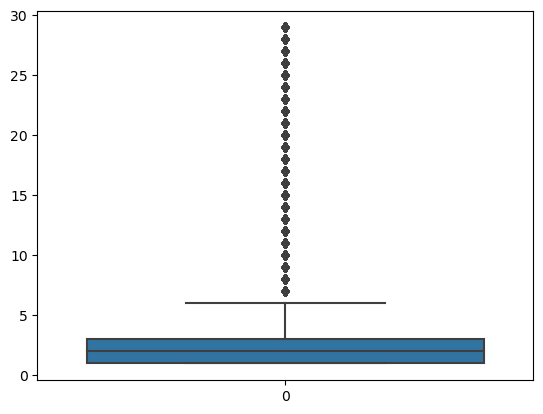

In [45]:
sns.boxplot(tmp[tmp < 30])

In [46]:
list_unique_words = list((tmp[tmp == 1]).index)
len(list_unique_words)

162340

##### ... saving the words appearing only once in the corpus ...

In [ ]:
list_unique_words_df = pd.DataFrame({"words" : list_unique_words})
list_unique_words_df.to_csv("data/cleaned/unique_words.csv", index=False)
list_unique_words_df

In [ ]:
list_min_5_words = list((tmp[tmp < 5]).index)

In [ ]:
len(list_min_5_words )

In [ ]:
list_min_5_words.sample(20)

##### ... saving the words apperaing 5 times or less in the corpus ...

In [ ]:
list_min_5_words_df = pd.DataFrame({"words" : list_min_5_words})
list_min_5_words_df.to_csv("data/cleaned/min_5_words.csv", index=False)

In [ ]:
list_min_10_words = list((tmp[tmp < 10]).index)
len(list_min_10_words)

##### ... saving the words appearing 10 times or less in the corpus ...

In [ ]:
list_min_10_words_df = pd.DataFrame({"words" : list_min_10_words})
list_min_10_words_df.to_csv("data/cleaned/min_10_words.csv", index=False)